In [1]:
import mtcnn

print(mtcnn.__version__)

0.1.0


In [2]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from pathlib import Path

In [3]:
detector = MTCNN()

In [15]:
#filename = "../../../faces_data_test/no_faces/Le_Superchicche.jpg"
filename = "../../../faces_data_test/person/raimondo_schettini.jpg"

pixels = pyplot.imread(filename)
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

1/1 [==============================] - 0s 10ms/step
{'box': [71, 45, 354, 468], 'confidence': 0.9996784925460815, 'keypoints': {'left_eye': (151, 228), 'right_eye': (306, 219), 'nose': (217, 319), 'mouth_left': (162, 388), 'mouth_right': (318, 382)}}


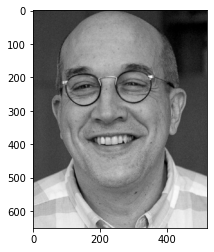

In [16]:
[X,Y,W,H] = faces[0]['box']
pyplot.imshow(pixels)

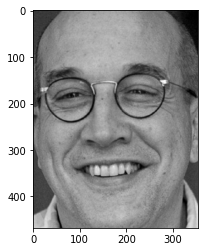

In [17]:
crop = pixels[Y:Y+H, X:X+W]
pyplot.imshow(crop)

In [18]:
faces = detector.detect_faces(crop)
for face in faces:
	print(face)

1/1 [==============================] - 0s 10ms/step
{'box': [5, 11, 334, 452], 'confidence': 0.9948834776878357, 'keypoints': {'left_eye': (79, 187), 'right_eye': (230, 177), 'nose': (146, 272), 'mouth_left': (89, 342), 'mouth_right': (249, 333)}}


In [22]:
IMAGES = "../../../faces_data_test/"
OK_IMAGES = IMAGES + "/person"
NO_IMAGES= IMAGES + "/no_faces"

OK_PATHS = list(Path(OK_IMAGES).rglob("*.jpg"))
NO_PATHS = list(Path(NO_IMAGES).rglob("*.jpg"))

In [52]:
OK_PATHS

[WindowsPath('../../../faces_data_test/person/0001.jpg'),
 WindowsPath('../../../faces_data_test/person/0002.jpg'),
 WindowsPath('../../../faces_data_test/person/0003.jpg'),
 WindowsPath('../../../faces_data_test/person/0004.jpg'),
 WindowsPath('../../../faces_data_test/person/0005.jpg'),
 WindowsPath('../../../faces_data_test/person/0006.jpg'),
 WindowsPath('../../../faces_data_test/person/0007.jpg'),
 WindowsPath('../../../faces_data_test/person/0008.jpg'),
 WindowsPath('../../../faces_data_test/person/0009.jpg'),
 WindowsPath('../../../faces_data_test/person/0010.jpg'),
 WindowsPath('../../../faces_data_test/person/0011.jpg'),
 WindowsPath('../../../faces_data_test/person/0012.jpg'),
 WindowsPath('../../../faces_data_test/person/0013.jpg'),
 WindowsPath('../../../faces_data_test/person/0014.jpg'),
 WindowsPath('../../../faces_data_test/person/0015.jpg'),
 WindowsPath('../../../faces_data_test/person/0016.jpg'),
 WindowsPath('../../../faces_data_test/person/0017.jpg'),
 WindowsPath('

In [23]:
detector = MTCNN()

In [34]:

f_neg = 0
f_pos = 0
t_pos = 0
t_neg = 0


In [ ]:
%%capture
for i in OK_PATHS:
    im = pyplot.imread(i)
    result_list = detector.detect_faces(im)
    if len(result_list) == 0:
        f_neg += 1 
    else:
        t_pos += 1

In [38]:
%%capture
imgs = []
for j in NO_PATHS:
    im = pyplot.imread(j)
    result_list = detector.detect_faces(im)
    num_faces=0

    if len(result_list)==1:
        [X,Y,W,H] = result_list[0]['box']
        crop = im[Y:Y+H, X:X+W]
        faces = detector.detect_faces(crop)
        if len(faces) == 1:
            imgs.append(crop)
            f_pos += 1
        else:
            t_neg +=1
    elif len(result_list)>1:
        for result in result_list:
            [X,Y,W,H] = result['box']
            crop = im[Y:Y+H, X:X+W]
            faces = detector.detect_faces(crop)
            if len(faces) == 1:
                imgs.append(crop)
                num_faces += 1
        if num_faces > 0:
            f_pos +=1
        else:
            t_neg +=1
    else:
        t_neg +=1

In [40]:
print([t_pos, f_neg])
print([f_pos, t_neg])

[0, 0]
[4, 70]


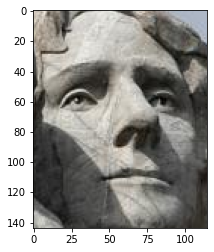

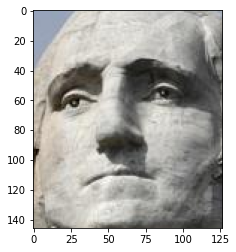

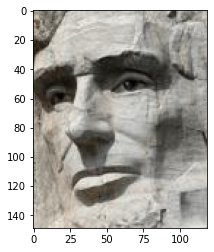

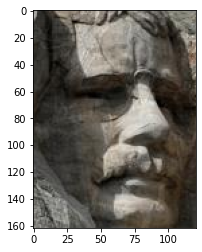

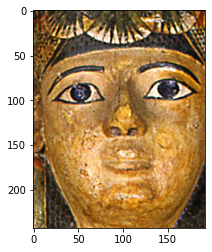

In [39]:
for el in imgs:
    pyplot.figure()
    pyplot.imshow(el)